In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [28]:
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Sp/Imagenes_confocal/sp_para entrenar/'
pathlist = Path(path).glob('*.csv')
sparks_data_list = []
for file in pathlist:
    path_in_str = str(file)
    df = pd.read_csv(path_in_str)
    sparks_data_list.append(df)
sparks_data_list = pd.concat(sparks_data_list)
del (sparks_data_list['Unnamed: 0'])
del (sparks_data_list['minim'])
del (sparks_data_list['pos_x'])
del (sparks_data_list['pos_y'])
del (sparks_data_list['FWHM'])
del (sparks_data_list['FDHM'])

In [29]:
print(sparks_data_list.shape)

(2397, 19)


In [30]:
print(sparks_data_list['flag'].unique())

[2. 1.]


In [31]:
print(sparks_data_list.groupby('flag').size())

flag
1.0    1113
2.0    1284
dtype: int64


/home/leandro/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


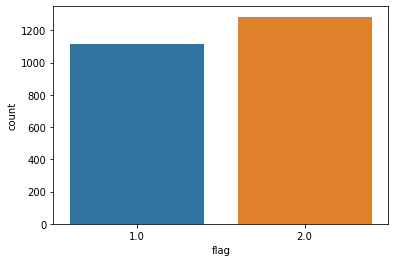

In [32]:
import seaborn as sns
sns.countplot(sparks_data_list['flag'],label="Count")
plt.show()

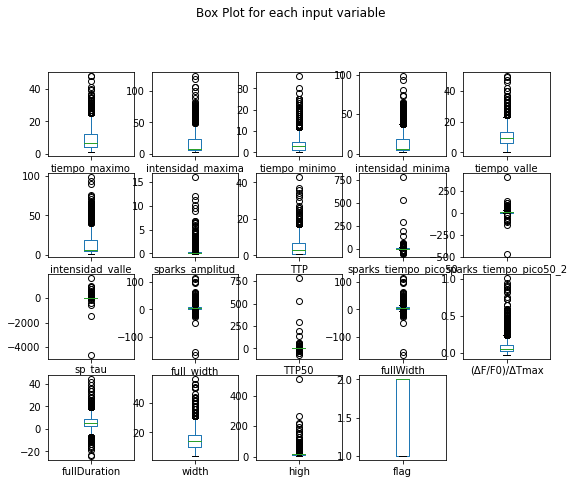

In [33]:
sparks_data_list.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.show()

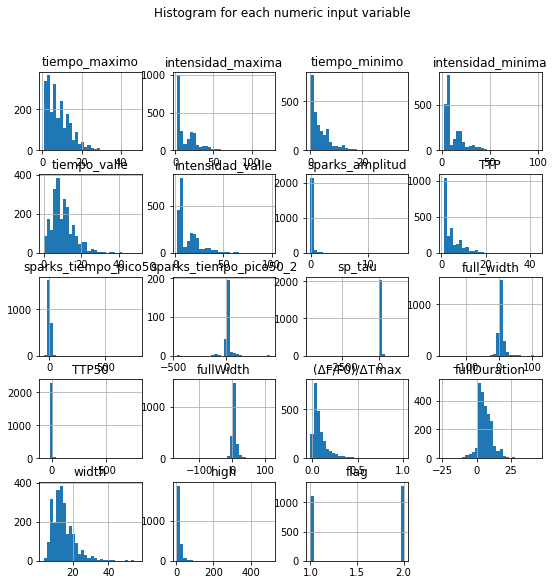

In [34]:
import pylab as pl
sparks_data_list.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
# plt.savefig('fruits_hist')
plt.show()

In [35]:
from matplotlib import cm

feature_names = list(sparks_data_list.columns)
feature_names.remove('flag')
X = sparks_data_list[feature_names]
y = sparks_data_list['flag']
# cmap = cm.get_cmap('gnuplot')
# scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
# plt.suptitle('Scatter-matrix for each input variable')
# plt.savefig('fruits_scatter_matrix')

In [36]:
feature_names

['tiempo_maximo',
 'intensidad_maxima',
 'tiempo_minimo',
 'intensidad_minima',
 'tiempo_valle',
 'intensidad_valle',
 'sparks_amplitud',
 'TTP',
 'sparks_tiempo_pico50',
 'sparks_tiempo_pico50_2',
 'sp_tau',
 'full_width',
 'TTP50',
 'fullWidth',
 '(ΔF/F0)/ΔTmax',
 'fullDuration',
 'width',
 'high']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# Tratamiento de NaN
imp = SimpleImputer(missing_values=np.nan, strategy='median') # Uso el promedio para reemplazar
imp.fit(X_train)
X_train = imp.transform(X_train)

imp.fit(X_test)
X_test = imp.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=15.0)
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.61
Accuracy of Logistic regression classifier on test set: 0.60


/home/leandro/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.60


In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='ball_tree')
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.65


In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.61
Accuracy of LDA classifier on test set: 0.60


In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
print('Accuracy of QDA classifier on training set: {:.2f}'
     .format(qda.score(X_train, y_train)))
print('Accuracy of QDA classifier on test set: {:.2f}'
     .format(qda.score(X_test, y_test)))

Accuracy of QDA classifier on training set: 0.53
Accuracy of QDA classifier on test set: 0.49


/home/leandro/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.54
Accuracy of GNB classifier on test set: 0.58


In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[189 109]
 [101 201]]
              precision    recall  f1-score   support

         1.0       0.65      0.63      0.64       298
         2.0       0.65      0.67      0.66       302

    accuracy                           0.65       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.65      0.65      0.65       600



In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='1')
    patch1 = mpatches.Patch(color='#00FF00', label='2')
    plt.legend(handles=[patch0, patch1])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
    plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

In [ ]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,5,10,15,20])

In [ ]:
X